<div align="center">
    <h2>Analisando Preços de Casas da Cidade de <span style="color:green">Melbourne</span></h2>
    <img alt="Melbourne City" width="500px" src="./assets/img/melbourne-australia-skyline-restricted.jpg" />
    <h6>Machine Learning para previsão de preço das casas</h6>
</div>

#### Importação de bibliotécas e instalação de pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

#### Importação e tratamento da base para usar o modelo

In [2]:
base = pd.read_csv("./assets/docs/melb_data.csv")

In [3]:
# Retirando colunas que contém alta cardinalidade
base = base.drop(["Suburb", "Address", "SellerG", "Date"], axis=1)

In [4]:
# Retirando colunas que contém mais de 20% de valores nulos
base = base.drop(["BuildingArea", "YearBuilt"], axis=1)

In [5]:
base.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,"1,480,000.00",S,2.50,"3,067.00",2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,2,h,"1,035,000.00",S,2.50,"3,067.00",2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,3,h,"1,465,000.00",SP,2.50,"3,067.00",3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,3,h,"850,000.00",PI,2.50,"3,067.00",3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,4,h,"1,600,000.00",VB,2.50,"3,067.00",3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


#### Mostrando correlação entre as variáveis

C:\Users\bruno\AppData\Local\Temp\ipykernel_2108\678183803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")


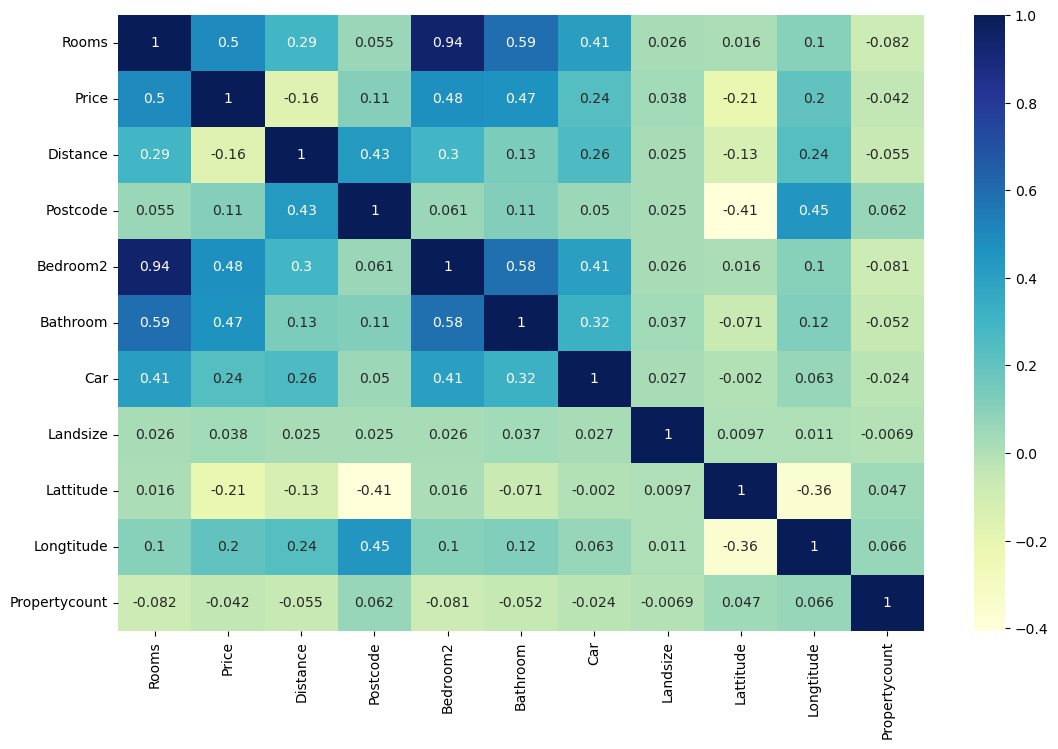

In [6]:
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")
plt.show()

##### Atualizando bibliotéca conforme aviso da documentação:
**_O aviso informa que o valor padrão de "numeric_only" será alterado em uma versão futura do pandas. Atualmente, o valor padrão é True, o que significa que apenas colunas numéricas são consideradas ao calcular a correlação. No entanto, na versão futura, o valor padrão será alterado para False, o que significa que todas as colunas serão consideradas na correlação, independentemente do tipo de dados._**

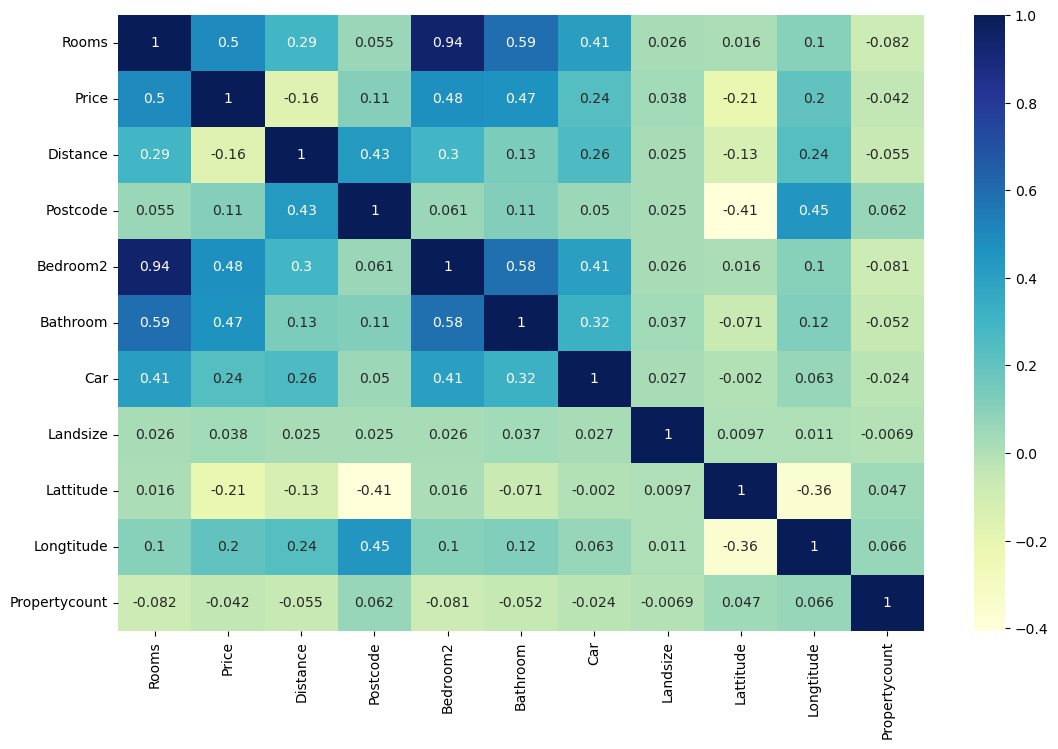

In [7]:
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.show()

checkpoint 10 minutos

#### Não teremos correlação entre as variáveis de texto, para isso precisaríamos transformar em variáveis numéricas caso queira usar essas variáveis

In [22]:
# Escolhendo o que tiver correlação mais alta e landsize pois retiramos o BuildingArea
base1 = base[["Price","Rooms","Bathroom","Bedroom2","Car","Landsize"]]

#### Verificando base tratada

In [23]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


#### Ainda temos valores nulos na coluna "Car" 

In [24]:
# Tratando valores nulos: retirando esses valores
base1 = base1.dropna(axis=0)

In [25]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


In [26]:
base1.head()

,Price,Rooms,Bathroom,Bedroom2,Car,Landsize
0,"1,480,000.00",2,1.00,2.00,1.00,202.00
1,"1,035,000.00",2,1.00,2.00,0.00,156.00
2,"1,465,000.00",3,2.00,3.00,0.00,134.00
3,"850,000.00",3,2.00,3.00,1.00,94.00
4,"1,600,000.00",4,1.00,3.00,2.00,120.00


#### Começando a criar nosso modelo de ML

###### O primeiro passo vai separar entre a nossa variável que queremos prever (Y) e quais são as colunas que vamos usar para essa previsão

In [27]:
Y = base1.Price
X = base1.drop('Price', axis=1)

#### Em seguida, vamos separar a nossa base em treino e teste

* A base de treino vai ser usada para treinar o modelo para que ele faça as previsões
* A base de teste vai ser usada para, ao usar o modelo já treinado, verificar o erro da previsão feita pelo modelo em relação aos valores reais

In [28]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

#### O próximo passo é escolher o modelo que vamos usar

<h2 style="color:red">Regressão Linear</h2>

In [29]:
# Importando o modelo
from sklearn.linear_model import LinearRegression

# Instanciando
modelo_regressao = LinearRegression()

# Realizando o fit do modelo
modelo_regressao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

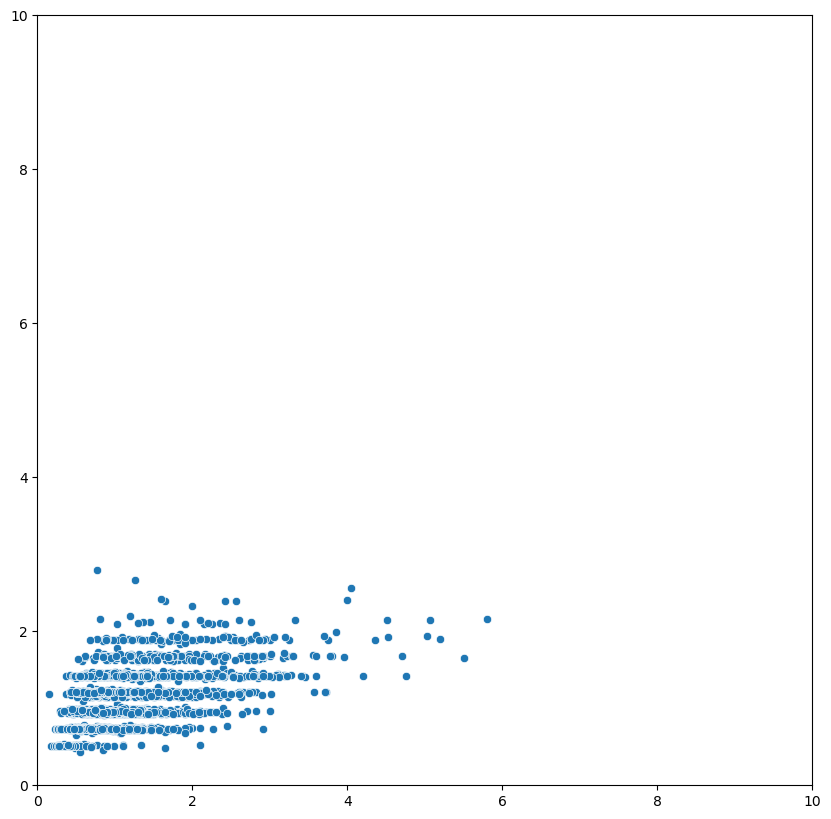

In [30]:
# Podemos visualizar os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

**Para avaliar o modelo, precisamos calcular os erros**

In [31]:
# Avaliando o erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste,y_regressao)
print(erro_quadratico_regressao)

275219937931.3606


In [32]:
# Avaliando o R quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste,y_regressao)
print(r2_regressao)

0.3092336783137932


### <font color='blue'>Regressão Linear: selecionando outras colunas </font>

In [33]:
# base1 = base1[["Price","Rooms","Bathroom","Bedroom2","Car","Longtitude","Lattitude","Distance","Landsize","Postcode","Propertycount"]]
base2 = base[["Price","Rooms","Bathroom","Bedroom2","Car","Longtitude","Lattitude","Distance","Landsize","Postcode","Propertycount"]]

In [34]:
# Verificando valores nulos e tratando
base2 = base2.dropna(axis=0)

base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bathroom       13518 non-null  float64
 3   Bedroom2       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Lattitude      13518 non-null  float64
 7   Distance       13518 non-null  float64
 8   Landsize       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Propertycount  13518 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


**Vamos fazer as mesmas etapas que fizemos anteriormente**

In [35]:
# Separando a base
Y = base2.Price
X = base2.drop('Price', axis=1)

# Dividindo em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

## Fazendo o fit para os novos dados
# Instanciando
modelo_regressao2 = LinearRegression()

# Realizando o fit do modelo
modelo_regressao2.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao2 = modelo_regressao2.predict(x_teste)

## Avaliando os erros
# Erro quadrático médio
erro_quadratico_regressao2 = mean_squared_error(y_teste,y_regressao2)
print(erro_quadratico_regressao2)

# R quadrado
r2_regressao2 = r2_score(y_teste,y_regressao2)
print(r2_regressao2)

206910418404.48373
0.5041569264642829


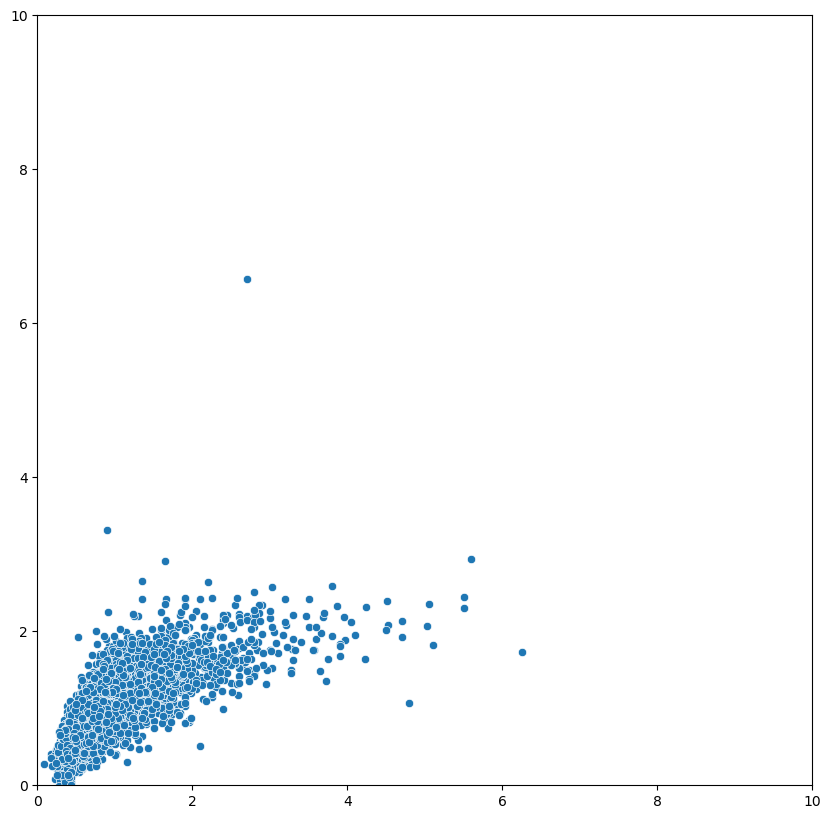

In [36]:
# Podemos visualizar os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

### <font color='blue'> Árvore de Decisão </font>
- Já vamos usar o mesmo treino e teste que fizemos na base anterior

In [37]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor

# Instanciando
modelo_arvore_decisao = DecisionTreeRegressor()

# Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [38]:
## Avaliando os erros
# Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste,y_arvore_decisao)
print(erro_quadratico_arvore_decisao)

# R quadrado
r2_arvore_decisao = r2_score(y_teste,y_arvore_decisao)
print(r2_arvore_decisao)

240518336159.81265
0.4236184337028339


### Fazendo um resumo dos resultados

In [39]:
print('Regressão Linear')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao,2)))
print('R quadrado: '+ str(round(r2_regressao,4)))
print('-----------------------------------------')
print('Regressão Linear: novas features')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao2,2)))
print('R quadrado: '+ str(round(r2_regressao2,4)))
print('-----------------------------------------')
print('Árvore de Decisão')
print('Erro quadrático médio: ' + str(round(erro_quadratico_arvore_decisao,2)))
print('R quadrado: '+ str(round(r2_arvore_decisao,4)))

Regressão Linear
Erro quadrático médio: 275219937931.36
R quadrado: 0.3092
-----------------------------------------
Regressão Linear: novas features
Erro quadrático médio: 206910418404.48
R quadrado: 0.5042
-----------------------------------------
Árvore de Decisão
Erro quadrático médio: 240518336159.81
R quadrado: 0.4236
